In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_csv('Desktop/NCHS_-_Leading_Causes_of_Death__United_States.csv')
df = df.drop('Age-adjusted Death Rate', axis=1)
unintentional = df[(df['Cause Name']=='Unintentional injuries') & (df['State']=='United States')].groupby('Year').aggregate(np.sum)
heart_disease = df[(df['Cause Name']=='Heart disease') & (df['State']=='United States')].groupby('Year').aggregate(np.sum)
all_causes = df[(df['Cause Name']=='All causes') & (df['State']=='United States')].groupby('Year').aggregate(np.sum)
ohio_deaths = df[(df['Cause Name']=='Unintentional injuries') & (df['State']=='Ohio')].groupby('Year').aggregate(np.sum)
percent_unintentional = unintentional/all_causes * 100

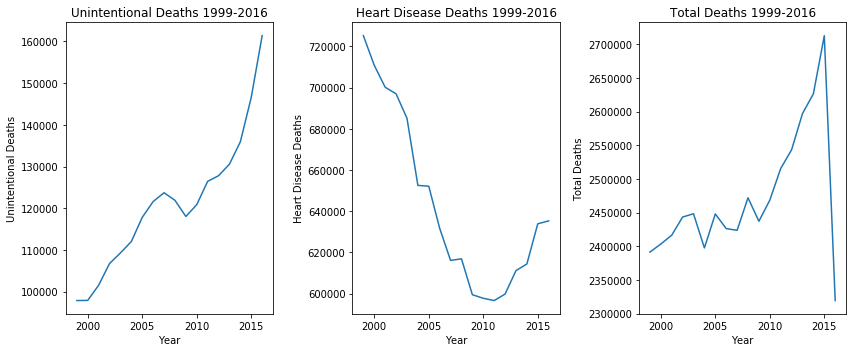

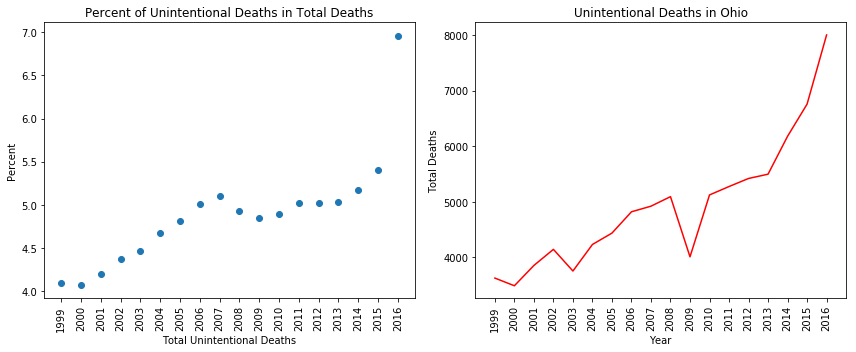

In [21]:
plt.figure(figsize = (12,5))
# This is a plot of the unintentional deaths that occured every year in the US for the years 1999-2016.
# There is a clear 'positive trend' that the amount of unintentional deaths has been increasing over this time period
# and rather sharply the last 6-7 years.
# This is likely due in part to the opioid crisis that is currently gripping our country.
plt.subplot(1,3,1)
plt.plot(unintentional) 
plt.ylabel('Unintentional Deaths')
plt.xlim(1998, 2017)
plt.xlabel('Year')
plt.title('Unintentional Deaths 1999-2016')

# This is a plot of heart disease deaths in the US for the years 1999 - 2016.
# This cause of death was decreasing steadily until around 2011 and has increased every year since.
plt.subplot(1,3,2)
plt.plot(heart_disease)
plt.ylabel('Heart Disease Deaths')
plt.xlim(1998, 2017)
plt.xlabel('Year')
plt.title('Heart Disease Deaths 1999-2016')

# This is a plot of the total amount of deaths in the US for the years 1999-2016.
# The amount is stable from 1999-2009 when the total began to rise sharply due in part to the drug crisis.
# The 2016 data is likely an outlier and would warrant further investigation.
plt.subplot(1,3,3)
plt.plot(all_causes)
plt.ylabel('Total Deaths')
plt.xlim(1998, 2017)
plt.xlabel('Year')
plt.title('Total Deaths 1999-2016')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,5))

# This is a scatter plot of the amount of unintentional deaths and what percent of the total deaths that they represent.
# 
plt.subplot(1,2,1)
plt.scatter(percent_unintentional.index, percent_unintentional)
plt.title('Percent of Unintentional Deaths in Total Deaths')
plt.ylabel('Percent')
plt.xlabel('Total Unintentional Deaths')
plt.xticks(percent_unintentional.index, rotation='vertical')

# This is a plot of the unintentional deaths in the state of Ohio for the years 1999-2016.
# Beginning in 2009 there was a drastic increase in these deaths.
# The likely cause is the drug crisis.
plt.subplot(1,2,2)
plt.plot(ohio_deaths, color='red')
plt.title('Unintentional Deaths in Ohio')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xlim(1998, 2017)
plt.xticks(ohio_deaths.index, rotation='vertical')

plt.tight_layout()
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 5 columns):
Year              10296 non-null int64
113 Cause Name    10296 non-null object
Cause Name        10296 non-null object
State             10296 non-null object
Deaths            10296 non-null int64
dtypes: int64(2), object(3)
memory usage: 402.3+ KB


In [8]:
df['Cause Name'].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Cancer', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'],
      dtype=object)